## LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler

In [3]:
rounds_df = pd.read_csv('dataset/rounds2.csv', encoding = "ISO-8859-1")

In [4]:
rounds_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
rounds_df.columns

Index(['company_permalink', 'funding_round_permalink', 'funding_round_type',
       'funding_round_code', 'funded_at', 'raised_amount_usd'],
      dtype='object')

#CHECKING FOR NAN Values

In [6]:
rounds_df.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [7]:
rounds_df.drop(['funding_round_permalink',
       'funding_round_code', 'funded_at'], axis = 1, inplace = True)

In [8]:
rounds_df.company_permalink = rounds_df.company_permalink.str.lower()

In [9]:
rounds_df.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [10]:
rounds_df.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [11]:
rounds_df.rename(columns = {"company_permalink" : "permalink"}, inplace = True)

In [12]:
rounds_df.columns

Index(['permalink', 'funding_round_type', 'raised_amount_usd'], dtype='object')

# END OF PART - I : Rounds Data cleaned and ready to be processed

# PART - II : Companies dataframe

In [13]:
companies_df = pd.read_csv("dataset/companies.txt", sep='\t', engine = 'python')

In [14]:
companies_df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [15]:
companies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [16]:
companies_df.isnull().sum()

permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

In [17]:
companies_df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at'],
      dtype='object')

In [18]:
companies_df.drop([ 'homepage_url',
        'state_code', 'region', 'city', 'founded_at'], inplace = True, axis = 1)

In [19]:
companies_df.category_list.head()

0                                                Media
1    Application Platforms|Real Time|Social Network...
2                                    Apps|Games|Mobile
3                                          Curated Web
4                                             Software
Name: category_list, dtype: object

In [20]:
"""
from sklearn.impute import SimpleImputer as si
imputer = si(strategy = 'most_frequent')
imputer = imputer.fit(companies_df.category_list)
"""

"\nfrom sklearn.impute import SimpleImputer as si\nimputer = si(strategy = 'most_frequent')\nimputer = imputer.fit(companies_df.category_list)\n"

In [21]:
companies_df.name.dropna(inplace = True)

In [22]:
companies_df.name = companies_df.name.str.lower()

In [23]:
companies_df.category_list.dropna(inplace = True)

In [24]:
companies_df.status.unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [25]:
companies_df.country_code.unique()

array(['IND', 'USA', nan, 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'DNK', 'ROM', 'AUT', 'KOR', 'NLD', 'SWE', 'JPN', 'RUS', 'SGP',
       'NOR', 'COL', 'ESP', 'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE',
       'DEU', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR', 'HUN', 'BWA', 'NGA',
       'FIN', 'TUR', 'IDN', 'ARE', 'CYP', 'POL', 'CRI', 'PRT', 'ARG',
       'TWN', 'KHM', 'THA', 'SVK', 'UKR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'VEN', 'URY', 'MUS', 'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'PSE',
       'MYS', 'PER', 'EGY', 'PAN', 'LVA', 'GGY', 'ALB', 'UGA', 'HRV',
       'EST', 'LBN', 'GRC', 'PAK', 'NPL', 'LUX', 'SAU', 'IRN', 'GTM',
       'BAH', 'ARM', 'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC',
       'TAN', 'PRI', 'TTO', 'BHR', 'CMR', 'BLR', 'CYM', 'BRN', 'ECU',
       'SLV', 'MLT', 'ZMB', 'MKD', 'GIB', 'TGO', 'LAO', 'BMU', 'HND',
       'MCO', 'MMR', 'KAZ', 'QAT', 'DOM', 'MAR', 'LIE', 'GEO', 'MOZ',
       'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA', 'DMA', 'UZB', 'BLZ',
       'OMN', '

In [26]:
companies_df.country_code.isnull().sum()

6958

In [27]:
companies_df.country_code.mode()

0    USA
Name: country_code, dtype: object

In [28]:
companies_df.fillna("USA", inplace = True)

In [29]:
companies_df.country_code.unique()

array(['IND', 'USA', 'CHN', 'HKG', 'CAN', 'CHL', 'GBR', 'FRA', 'AUS',
       'DNK', 'ROM', 'AUT', 'KOR', 'NLD', 'SWE', 'JPN', 'RUS', 'SGP',
       'NOR', 'COL', 'ESP', 'BEL', 'IRL', 'ITA', 'ISR', 'NZL', 'CZE',
       'DEU', 'CHE', 'BRA', 'BGR', 'SVN', 'JOR', 'HUN', 'BWA', 'NGA',
       'FIN', 'TUR', 'IDN', 'ARE', 'CYP', 'POL', 'CRI', 'PRT', 'ARG',
       'TWN', 'KHM', 'THA', 'SVK', 'UKR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'VEN', 'URY', 'MUS', 'KEN', 'PHL', 'MNE', 'VNM', 'GHA', 'PSE',
       'MYS', 'PER', 'EGY', 'PAN', 'LVA', 'GGY', 'ALB', 'UGA', 'HRV',
       'EST', 'LBN', 'GRC', 'PAK', 'NPL', 'LUX', 'SAU', 'IRN', 'GTM',
       'BAH', 'ARM', 'BGD', 'MDA', 'SRB', 'TUN', 'ZWE', 'BRB', 'NIC',
       'TAN', 'PRI', 'TTO', 'BHR', 'CMR', 'BLR', 'CYM', 'BRN', 'ECU',
       'SLV', 'MLT', 'ZMB', 'MKD', 'GIB', 'TGO', 'LAO', 'BMU', 'HND',
       'MCO', 'MMR', 'KAZ', 'QAT', 'DOM', 'MAR', 'LIE', 'GEO', 'MOZ',
       'DZA', 'JAM', 'KNA', 'AZE', 'SEN', 'RWA', 'DMA', 'UZB', 'BLZ',
       'OMN', 'JEY',

In [30]:
companies_df.country_code.isnull().sum()

0

In [31]:
companies_df.isnull().sum()

permalink        0
name             0
category_list    0
status           0
country_code     0
dtype: int64

In [32]:
companies_df.permalink = companies_df.permalink.str.lower()

In [33]:
df = pd.merge(rounds_df, companies_df, how = "inner", on = "permalink")

In [34]:
df.head()

,permalink,funding_round_type,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,venture,10000000.0,#fame,Media,operating,IND
1,/organization/-qounter,venture,NaN,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
2,/organization/-qounter,seed,700000.0,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,venture,3406878.0,"(the) one of them,inc.",Apps|Games|Mobile,operating,USA
4,/organization/0-6-com,venture,2000000.0,0-6.com,Curated Web,operating,CHN


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114917 entries, 0 to 114916
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   permalink           114917 non-null  object 
 1   funding_round_type  114917 non-null  object 
 2   raised_amount_usd   94942 non-null   float64
 3   name                114917 non-null  object 
 4   category_list       114917 non-null  object 
 5   status              114917 non-null  object 
 6   country_code        114917 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.0+ MB


In [36]:
df.category_list

0                                                     Media
1         Application Platforms|Real Time|Social Network...
2         Application Platforms|Real Time|Social Network...
3                                         Apps|Games|Mobile
4                                               Curated Web
                                ...                        
114912          Advertising|Mobile|Web Development|Wireless
114913          Advertising|Mobile|Web Development|Wireless
114914          Advertising|Mobile|Web Development|Wireless
114915                                                  USA
114916                   Consumer Goods|E-Commerce|Internet
Name: category_list, Length: 114917, dtype: object

In [37]:
df.dropna(inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94942 entries, 0 to 114916
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           94942 non-null  object 
 1   funding_round_type  94942 non-null  object 
 2   raised_amount_usd   94942 non-null  float64
 3   name                94942 non-null  object 
 4   category_list       94942 non-null  object 
 5   status              94942 non-null  object 
 6   country_code        94942 non-null  object 
dtypes: float64(1), object(6)
memory usage: 5.8+ MB


# PART - II : End of part II

# PART - III : Analysing Data

In [39]:
df.columns

Index(['permalink', 'funding_round_type', 'raised_amount_usd', 'name',
       'category_list', 'status', 'country_code'],
      dtype='object')

In [40]:
df.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'convertible_note',
       'private_equity', 'debt_financing', 'angel', 'grant',
       'equity_crowdfunding', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'secondary_market',
       'non_equity_assistance'], dtype=object)

In [41]:
df.raised_amount_usd.describe()[::-1]

max      2.127194e+10
75%      7.000000e+06
50%      1.682532e+06
25%      3.230062e+05
min      0.000000e+00
std      1.148314e+08
mean     1.042810e+07
count    9.494200e+04
Name: raised_amount_usd, dtype: float64

## Maximum value is in the order of power of 10, which is a highly impossible investment amount
Thus definitely an outlier

## Scaling Down to the power of 6

In [42]:
df.raised_amount_usd /= 1e06 

In [43]:
df = df[(df.raised_amount_usd != 0) & (df.raised_amount_usd < 15) & (df.raised_amount_usd > 5)]

<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

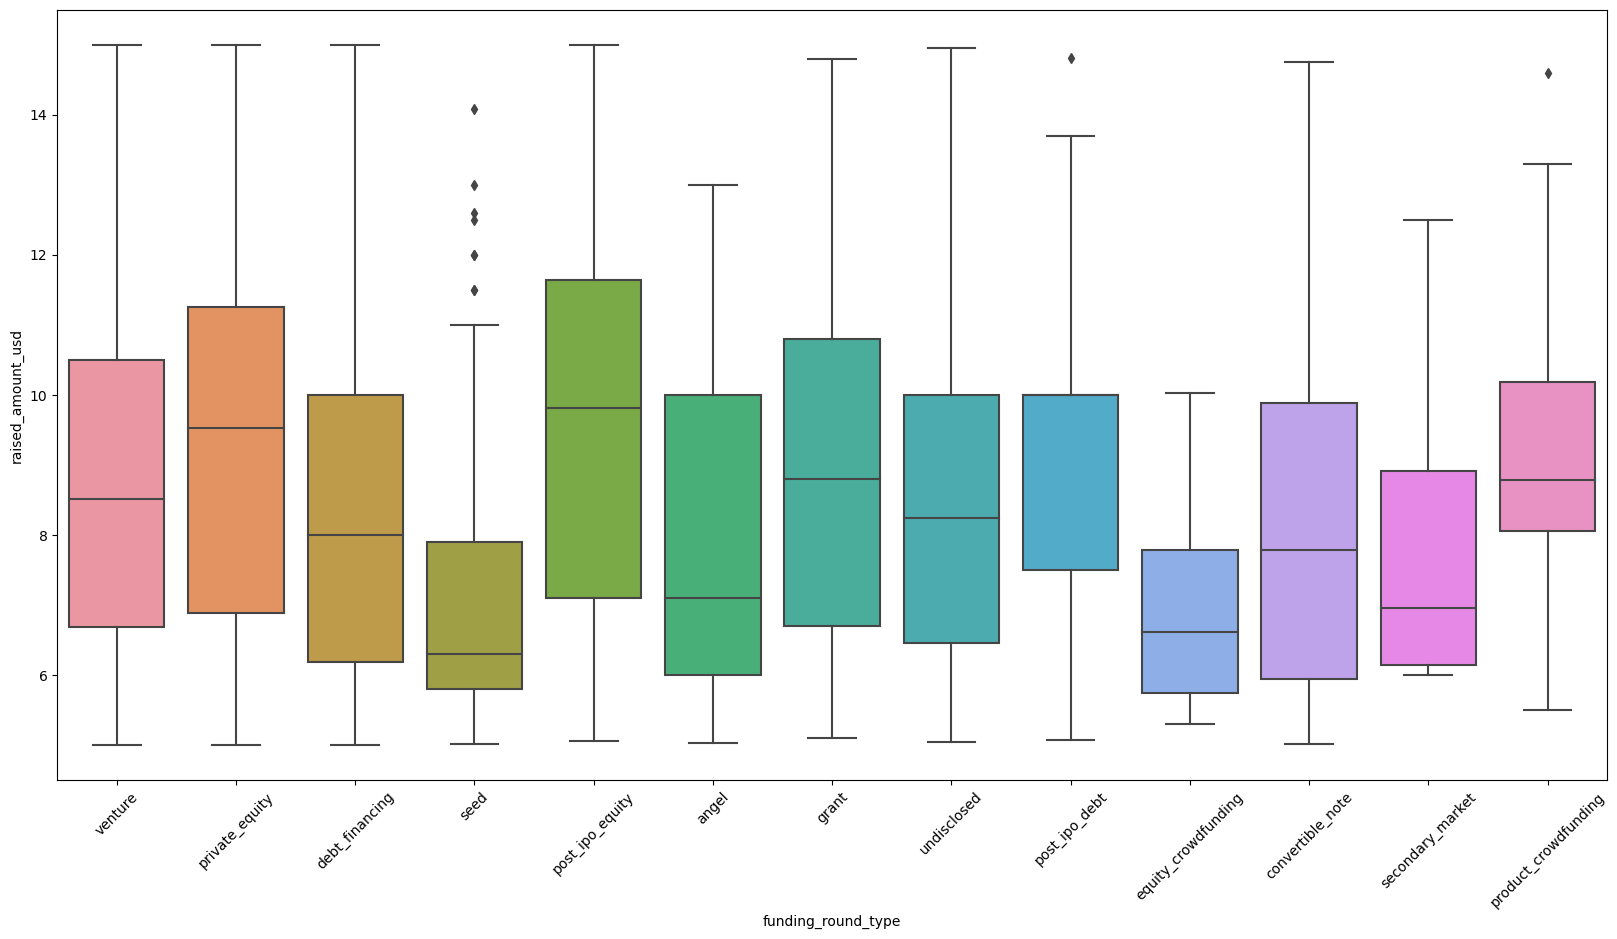

In [44]:
plt.figure(figsize = [20,10])
plt.xticks(rotation = 45)
sns.boxplot(x = 'funding_round_type', y = 'raised_amount_usd', data = df )

In [45]:
df.raised_amount_usd.info()

<class 'pandas.core.series.Series'>
Int64Index: 15595 entries, 0 to 114905
Series name: raised_amount_usd
Non-Null Count  Dtype  
--------------  -----  
15595 non-null  float64
dtypes: float64(1)
memory usage: 243.7 KB


# outlier treatment based on Box Plot 


In [46]:
####Removing outliers 
q1 = df.groupby('funding_round_type')['raised_amount_usd'].quantile([0.25, 0.75])
#q3 = np.percentile(df.raised_amount_usd, 75)
#IQR = q3-q1
#lwr_bound = q1-(1.5*IQR)
#upr_bound = q3+(1.5*IQR)

In [47]:
###OutlierTreatment
new_df = pd.DataFrame(columns = df.columns)
for key in df.funding_round_type.unique():
    IQR = q1[key][0.75] - q1[key][0.25]
    upr_bound = q1[key][0.75] + (1.5*IQR)
    df_copy = df[(df.funding_round_type == key) & (df.raised_amount_usd < upr_bound)]
    new_df = pd.concat([new_df, df_copy])
    
    

In [48]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15585 entries, 0 to 110689
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           15585 non-null  object 
 1   funding_round_type  15585 non-null  object 
 2   raised_amount_usd   15585 non-null  float64
 3   name                15585 non-null  object 
 4   category_list       15585 non-null  object 
 5   status              15585 non-null  object 
 6   country_code        15585 non-null  object 
dtypes: float64(1), object(6)
memory usage: 974.1+ KB


In [49]:
df = new_df

In [50]:
scalar = StandardScaler()


In [51]:
df['scaled_amount'] = scalar.fit_transform(np.array(df.raised_amount_usd).reshape(-1,1))

In [52]:
df.scaled_amount.describe()

count    1.558500e+04
mean    -1.053472e-15
std      1.000032e+00
min     -1.518278e+00
25%     -8.894859e-01
50%     -1.412459e-01
75%      6.456297e-01
max      2.416099e+00
Name: scaled_amount, dtype: float64

<AxesSubplot:xlabel='scaled_amount', ylabel='Count'>

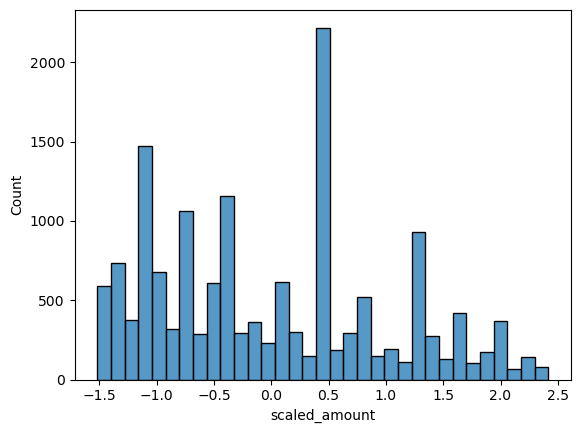

In [53]:
sns.histplot(df.scaled_amount)

In [54]:
df.funding_round_type.value_counts()

venture                 13799
debt_financing            659
private_equity            361
undisclosed               192
grant                     153
seed                      137
post_ipo_equity           137
angel                      53
convertible_note           36
post_ipo_debt              22
equity_crowdfunding        18
product_crowdfunding       14
secondary_market            4
Name: funding_round_type, dtype: int64

<AxesSubplot:xlabel='funding_round_type', ylabel='scaled_amount'>

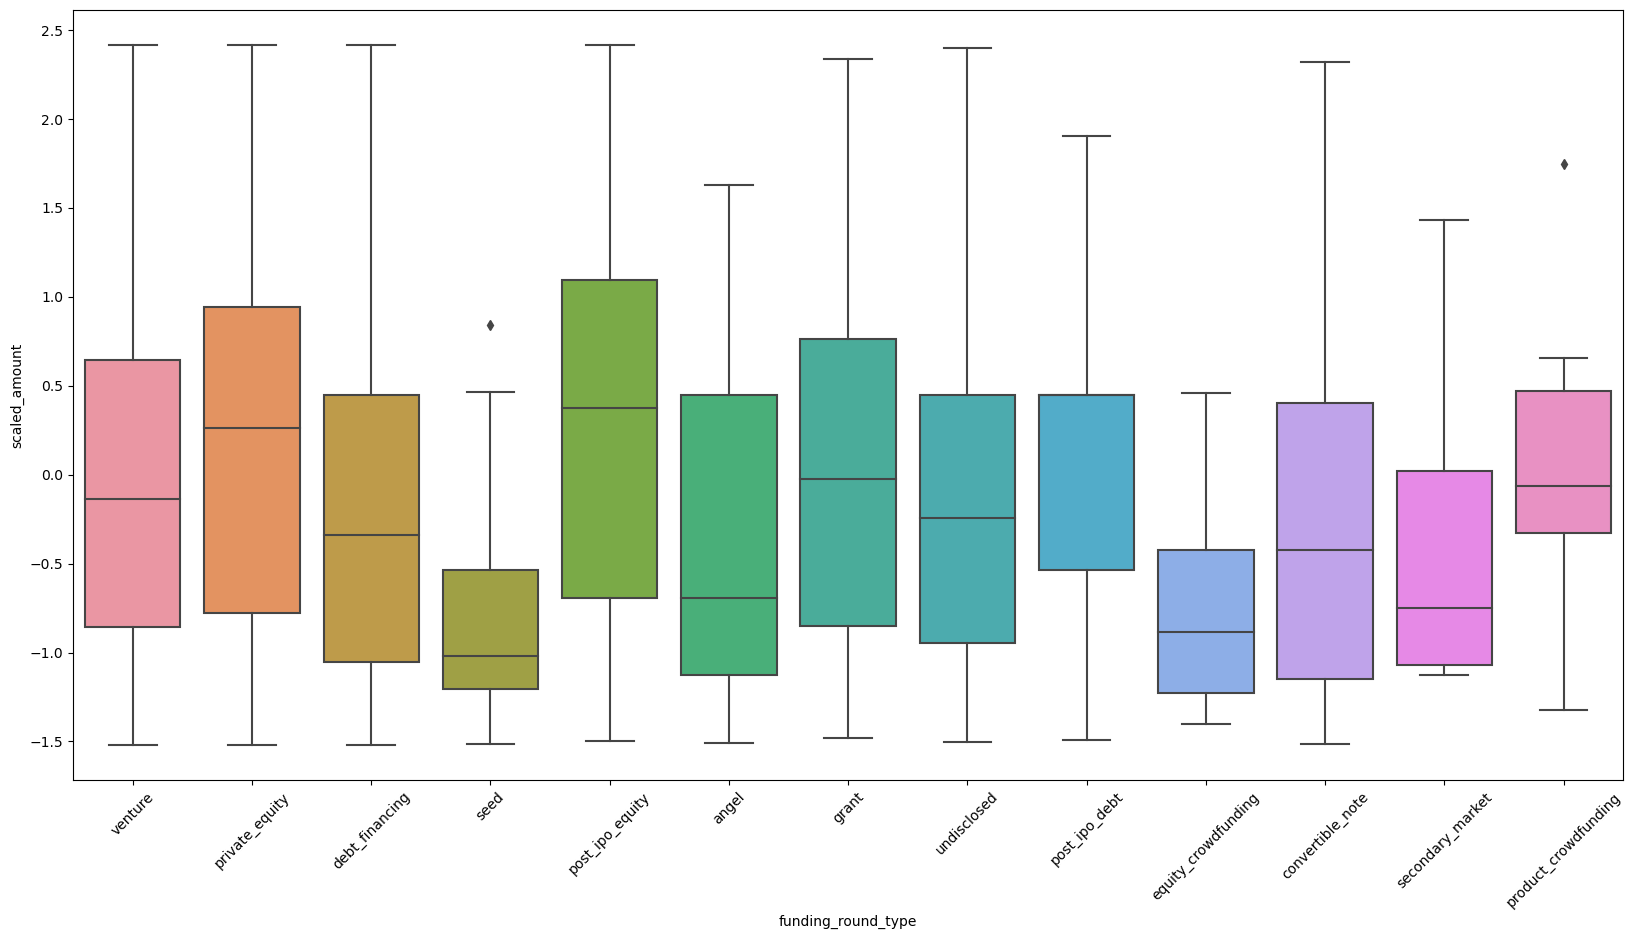

In [55]:
plt.figure(figsize = [20,10])
plt.xticks(rotation = 45)
sns.boxplot(x = 'funding_round_type', y = 'scaled_amount', data = df )

In [56]:
df.groupby(['funding_round_type']).raised_amount_usd.agg(['count', 'sum'])

,count,sum
funding_round_type,,
angel,53,414.289543
convertible_note,36,297.443046
debt_financing,659,5611.707809
equity_crowdfunding,18,125.531337
grant,153,1358.476162
post_ipo_debt,22,199.168349
post_ipo_equity,137,1292.391626
private_equity,361,3352.619646
product_crowdfunding,14,122.780692


<AxesSubplot:xlabel='funding_round_type', ylabel='raised_amount_usd'>

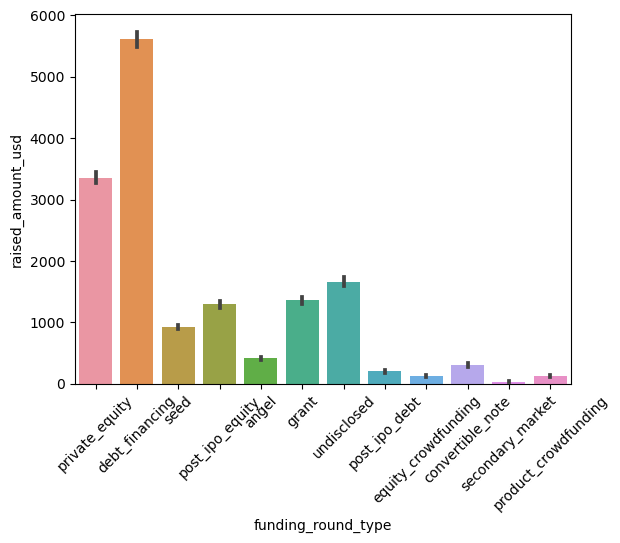

In [57]:
plt.xticks(rotation = 45)
sns.barplot(x = 'funding_round_type' , y = 'raised_amount_usd' , data = df[df.funding_round_type != 'venture'], estimator = np.sum)

In [58]:
df.country_code.unique()

array(['IND', 'USA', 'FRA', 'CHN', 'SGP', 'CAN', 'GBR', 'DEU', 'HKG',
       'SVN', 'BRA', 'JPN', 'SWE', 'THA', 'TWN', 'MEX', 'IRL', 'DNK',
       'ISR', 'MNE', 'ESP', 'BEL', 'AUS', 'RUS', 'CHE', 'EST', 'ITA',
       'NLD', 'AUT', 'NOR', 'HUN', 'NZL', 'ARM', 'KOR', 'FIN', 'TUR',
       'ROM', 'KEN', 'CYP', 'ARE', 'PHL', 'CYM', 'PRT', 'VNM', 'ARG',
       'CHL', 'LVA', 'IDN', 'POL', 'LUX', 'MYS', 'UKR', 'BGR', 'ISL',
       'ZAF', 'KAZ', 'NGA', 'LIE', 'CZE', 'TAN', 'JOR', 'PAK', 'BAH',
       'KWT', 'URY', 'EGY', 'BGD', 'LTU', 'MAF', 'GIB', 'MLT', 'GRC',
       'ZWE'], dtype=object)

In [59]:
country_df = pd.read_csv("dataset/country_code.csv")
english_df = pd.read_csv("dataset/english.csv")

In [60]:
country_df.drop(['alpha-2', 'country-code', 'iso_3166-2', 'region',
       'sub-region', 'intermediate-region', 'region-code', 'sub-region-code',
       'intermediate-region-code'], inplace = True, axis = 1)

In [61]:
country_df.columns

Index(['name', 'alpha-3'], dtype='object')

In [62]:
country_df.rename({'name':'countries'}, axis = 1, inplace = True)

In [63]:
country_df['countries'] = country_df['countries'].str.lower().replace(r'(\S+)\s(\S+).*', r'\1\2', regex=True)

In [64]:
english_df.columns

Index(['countries'], dtype='object')

In [65]:
english_df['countries'] = english_df['countries'].str.lower().replace(r'(\S+)\s(\S+).*', r'\1\2', regex=True)

In [66]:
english_df.countries.unique()

array(['unitedstates', 'canada', 'europe', 'republicof', 'malta',
       'caribbean', 'barbados', 'trinidadand', 'bahamas', 'guyana',
       'oceania', 'newzealand', 'papuanew', 'fiji', 'samoa', 'tonga',
       'solomonislands', 'micronesia', 'vanuatu', 'kiribati', 'india',
       'pakistan', 'singapore', 'philippines', 'srilanka', 'malaysia',
       'nigeria', 'cameroon', 'kenya', 'zimbabwe', 'ghana', 'rwanda',
       'sudan', 'botswana', 'ethiopia'], dtype=object)

In [67]:
country_df.countries.unique()

array(['afghanistan', 'ålandislands', 'albania', 'algeria',
       'americansamoa', 'andorra', 'angola', 'anguilla', 'antarctica',
       'antiguaand', 'argentina', 'armenia', 'aruba', 'australia',
       'austria', 'azerbaijan', 'bahamas', 'bahrain', 'bangladesh',
       'barbados', 'belarus', 'belgium', 'belize', 'benin', 'bermuda',
       'bhutan', 'bolivia(plurinational', 'bonaire,sint', 'bosniaand',
       'botswana', 'bouvetisland', 'brazil', 'britishindian',
       'bruneidarussalam', 'bulgaria', 'burkinafaso', 'burundi',
       'caboverde', 'cambodia', 'cameroon', 'canada', 'caymanislands',
       'centralafrican', 'chad', 'chile', 'china', 'christmasisland',
       'cocos(keeling)', 'colombia', 'comoros', 'congo',
       'congo,democratic', 'cookislands', 'costarica', "côted'ivoire",
       'croatia', 'cuba', 'curaçao', 'cyprus', 'czechia', 'denmark',
       'djibouti', 'dominica', 'dominicanrepublic', 'ecuador', 'egypt',
       'elsalvador', 'equatorialguinea', 'eritrea', 'es

In [68]:
country_df = country_df.merge(english_df, on = "countries", how = "inner")

In [69]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   countries  31 non-null     object
 1   alpha-3    31 non-null     object
dtypes: object(2)
memory usage: 744.0+ bytes


In [70]:
country_df.rename({'alpha-3':'country_code'}, axis = 1, inplace = True)

In [71]:
country_df.country_code.unique()

array(['BHS', 'BRB', 'BWA', 'CMR', 'CAN', 'ETH', 'FJI', 'GHA', 'GUY',
       'IND', 'KEN', 'KIR', 'MYS', 'MLT', 'NZL', 'NGA', 'PAK', 'PNG',
       'PHL', 'RWA', 'WSM', 'SGP', 'SLB', 'LKA', 'SDN', 'TON', 'TTO',
       'USA', 'UMI', 'VUT', 'ZWE'], dtype=object)

In [72]:
backup_df = df.copy()
df_english_filtered = df.merge(country_df, on = "country_code", how = "inner")

In [73]:
df_english_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12820 entries, 0 to 12819
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           12820 non-null  object 
 1   funding_round_type  12820 non-null  object 
 2   raised_amount_usd   12820 non-null  float64
 3   name                12820 non-null  object 
 4   category_list       12820 non-null  object 
 5   status              12820 non-null  object 
 6   country_code        12820 non-null  object 
 7   scaled_amount       12820 non-null  float64
 8   countries           12820 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1001.6+ KB


In [74]:
q2 = df_english_filtered.groupby('countries')['raised_amount_usd'].quantile([0.25, 0.75])
###OutlierTreatment
new_df2 = pd.DataFrame(columns = df_english_filtered.columns)
for key in df_english_filtered.countries.unique():
    IQR = q2[key][0.75] - q2[key][0.25]
    upr_bound = q2[key][0.75] + (1.5*IQR)
    df_copy = df_english_filtered[(df_english_filtered.countries == key) & (df_english_filtered.raised_amount_usd < upr_bound)]
    new_df2 = pd.concat([new_df2, df_copy])


In [75]:
new_df2.countries.value_counts()

unitedstates    12018
canada            437
india             255
singapore          64
newzealand         17
nigeria             8
malaysia            6
kenya               3
pakistan            3
philippines         2
Name: countries, dtype: int64

<AxesSubplot:>

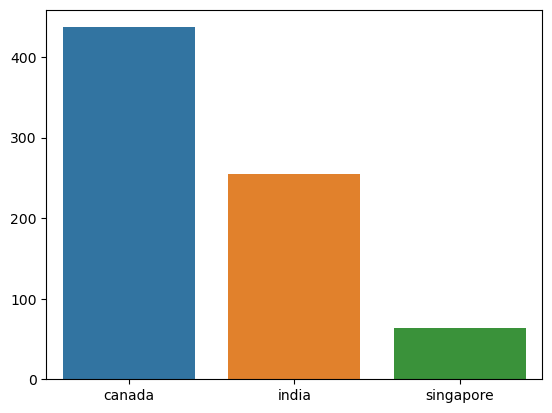

In [76]:
sns.barplot(x = new_df2.countries.value_counts().keys()[1:4], y = new_df2.countries.value_counts().values[1:4] )

<AxesSubplot:xlabel='countries', ylabel='raised_amount_usd'>

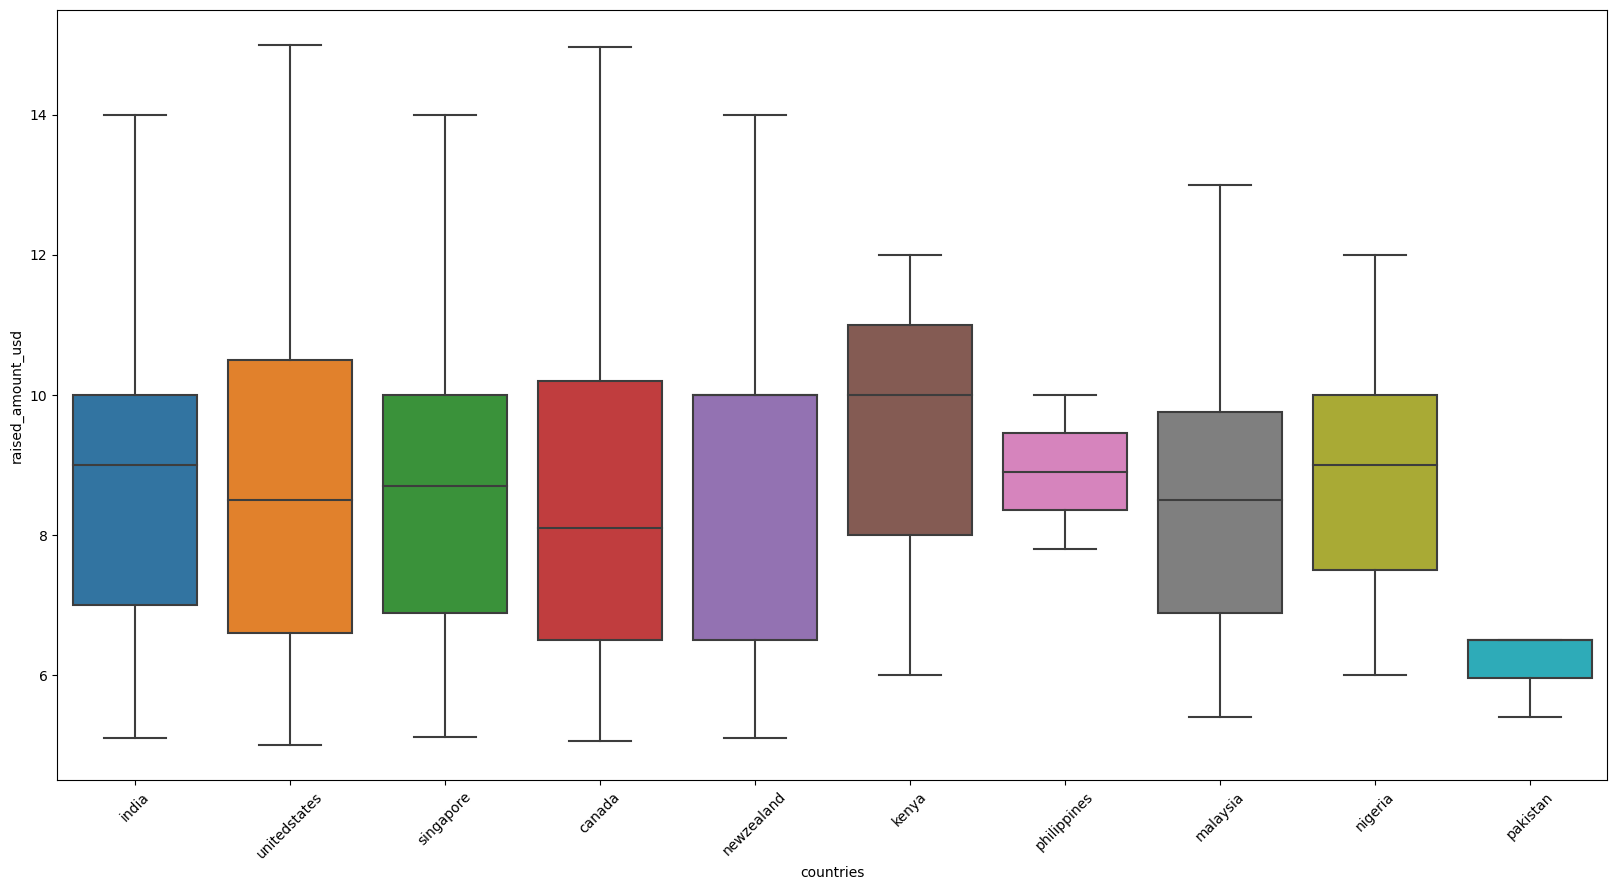

In [77]:
plt.figure(figsize = [20,10])
plt.xticks(rotation = 45)
sns.boxplot(x = 'countries', y = 'raised_amount_usd', data = new_df2)

In [78]:
new_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12813 entries, 0 to 12817
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   permalink           12813 non-null  object 
 1   funding_round_type  12813 non-null  object 
 2   raised_amount_usd   12813 non-null  float64
 3   name                12813 non-null  object 
 4   category_list       12813 non-null  object 
 5   status              12813 non-null  object 
 6   country_code        12813 non-null  object 
 7   scaled_amount       12813 non-null  float64
 8   countries           12813 non-null  object 
dtypes: float64(2), object(7)
memory usage: 1001.0+ KB


In [79]:
df = new_df2.copy()

## part 4:  Sector wise analyisis

In [80]:
df_mapping = pd.read_csv("mapping.csv")
df_mapping.info()
df_mapping = df_mapping.iloc[1:]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   category_list                            687 non-null    object
 1   Automotive & Sports                      688 non-null    int64 
 2   Blanks                                   688 non-null    int64 
 3   Cleantech / Semiconductors               688 non-null    int64 
 4   Entertainment                            688 non-null    int64 
 5   Health                                   688 non-null    int64 
 6   Manufacturing                            688 non-null    int64 
 7   News, Search and Messaging               688 non-null    int64 
 8   Others                                   688 non-null    int64 
 9   Social, Finance, Analytics, Advertising  688 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [81]:
df.category_list = df.category_list.str.lower()

In [82]:
#df_mapping.category_list = df_mapping.category_list.str.lower()

In [83]:
df_mapping.category_list.unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alter0tive Medicine', 'Alumni',
       'A0lytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bankin

# Observation -> na in words has been replaced with Zero

alternative : alter0tive
analytics : a0lytics
management : ma0gement

In [84]:
df_mapping.category_list = df_mapping.category_list.str.replace('0','na')

In [85]:
df_mapping.category_list.unique()

array(['3D', '3D Printing', '3D Technology', 'Accounting',
       'Active Lifestyle', 'Ad Targeting', 'Advanced Materials',
       'Adventure Travel', 'Advertising', 'Advertising Exchanges',
       'Advertising Networks', 'Advertising Platforms', 'Advice',
       'Aerospace', 'Agriculture', 'Air Pollution Control', 'Algorithms',
       'All Markets', 'All Students', 'Alternative Medicine', 'Alumni',
       'Analytics', 'Android', 'Angels', 'Animal Feed',
       'Anything Capital Intensive', 'App Discovery', 'App Marketing',
       'App Stores', 'Application Performance Monitoring',
       'Application Platforms', 'Apps', 'Aquaculture', 'Architecture',
       'Archiving', 'Art', 'Artificial Intelligence', 'Artists Globally',
       'Assisitive Technology', 'Assisted Living', 'Auctions', 'Audio',
       'Audiobooks', 'Augmented Reality', 'Auto', 'Automated Kiosk',
       'Automotive', 'B2B', 'B2B Express Delivery', 'Babies',
       'Baby Accessories', 'Baby Boomers', 'Baby Safety', 'Bank

In [86]:
df.category_list

0                                               media
1                                          e-commerce
2                                             finance
3                               entertainment|tourism
4        finance|finance technology|fintech|insurance
                             ...                     
12812                           business intelligence
12813                                          mobile
12814                                     curated web
12815                    career management|employment
12817                                          sports
Name: category_list, Length: 12813, dtype: object

In [87]:
df.category_list = df.category_list.str.split("|")

### Keeping only first category, to be the major category in main dataframe

In [88]:
df.category_list = df.category_list.apply(lambda x : x[0])

In [89]:
df.category_list

0                        media
1                   e-commerce
2                      finance
3                entertainment
4                      finance
                 ...          
12812    business intelligence
12813                   mobile
12814              curated web
12815        career management
12817                   sports
Name: category_list, Length: 12813, dtype: object

### Converting Wide to Long format for df.mapping

In [90]:
df_melted = pd.melt(df_mapping, id_vars=["category_list"], value_vars=df_mapping.columns[1:len(df_mapping)])

df_melted

,category_list,variable,value
0,3D,Automotive & Sports,0
1,3D Printing,Automotive & Sports,0
2,3D Technology,Automotive & Sports,0
3,Accounting,Automotive & Sports,0
4,Active Lifestyle,Automotive & Sports,0
...,...,...,...
6178,Wholesale,"Social, Finance, Analytics, Advertising",0
6179,Wine And Spirits,"Social, Finance, Analytics, Advertising",0
6180,Wireless,"Social, Finance, Analytics, Advertising",0
6181,Women,"Social, Finance, Analytics, Advertising",0


In [91]:
df_melted.value = df_melted.value.replace(0,np.nan)

df_melted.value.isna().sum()

df_melted.dropna(inplace = True)


## Merging dataframe with original dataframe 

In [92]:
df_melted.columns = df_melted.columns.str.lower()


In [93]:
df_melted.category_list = df_melted.category_list.str.lower()
df.category_list = df.category_list.str.lower()


In [94]:
df = df.merge(df_melted, how = 'inner', on = 'category_list')

In [95]:
#Renaming column varialble to Sector
df.rename(columns = {'variable':'sector'}, inplace = True)

In [96]:
df.groupby(['country_code', 'sector']).raised_amount_usd.agg(['count', 'sum'])

count           sum
country_code sector                                                      
CAN          Automotive & Sports                          3     29.738116
             Cleantech / Semiconductors                 125   1179.040423
             Entertainment                               17    129.739712
             Health                                      26    217.588647
             Manufacturing                               31    241.133071
             News, Search and Messaging                  44    386.750308
             Others                                     109    936.079979
             Social, Finance, Analytics, Advertising     77    629.811258
IND          Automotive & Sports                          7     66.900000
             Cleantech / Semiconductors                  15    133.980000
             Entertainment                               23    199.330000
             Health                                      18    163.740000
             Manufacturing                               17    151.150000
             News, Search and Messaging                  42    374.834545
             Others                                      83    746.028268
             Social, Finance, Analytics, Advertising     49    416.449550
KEN          Others                                       2     16.000000
             Social, Finance, Analytics, Advertising      1     12.000000
MYS          Cleantech / Semiconductors                   3     19.891547
             Others                                       3     32.000000
NGA          Entertainment                                2     16.000000
             News, Search and Messaging                   1     12.000000
             Others                                       2     20.000000
             Social, Finance, Analytics, Advertising      3     22.000000
NZL          Cleantech / Semiconductors                   4     29.172621
             Manufacturing                                1     14.000000
             News, Search and Messaging                   4     34.000000
             Others                                       4     30.500000
             Social, Finance, Analytics, Advertising      4     45.595300
PAK          Automotive & Sports                          1      5.400000
             News, Search and Messaging                   1      6.500000
             Social, Finance, Analytics, Advertising      1      6.500000
PHL          Cleantech / Semiconductors                   1      7.800000
             Social, Finance, Analytics, Advertising      1     10.000000
SGP          Automotive & Sports                          2     13.700000
             Cleantech / Semiconductors                   8     69.343144
             Entertainment                                9     84.907000
             Health                                       3     24.600000
             Manufacturing                                1      5.600000
             News, Search and Messaging                   8     68.893834
             Others                                      13    121.700000
             Social, Finance, Analytics, Advertising     20    178.187192
USA          Automotive & Sports                        182   1586.665072
             Cleantech / Semiconductors                2486  22550.305980
             Entertainment                              570   4925.871509
             Health                                     976   8774.216466
             Manufacturing                              828   7435.901694
             News, Search and Messaging                1462  12762.629667
             Others                                    2829  25180.493337
             Social, Finance, Analytics, Advertising   2535  22081.399023

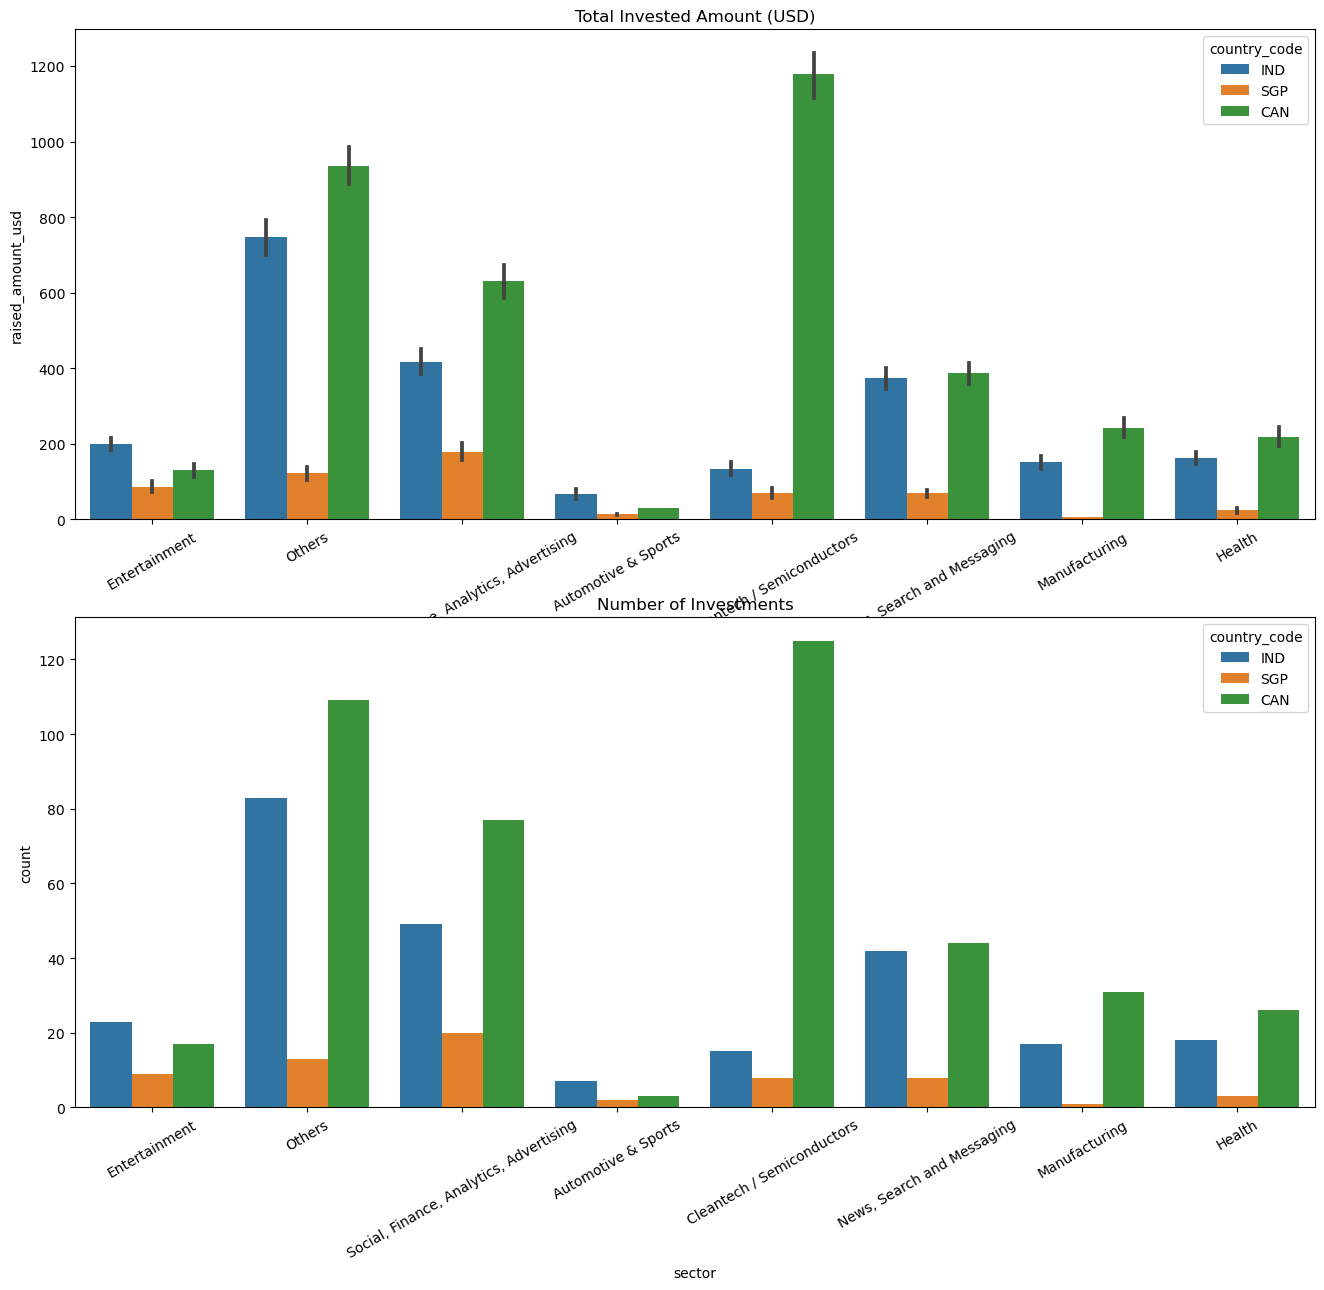

In [97]:
###PLot

plt.figure(figsize=(16, 14))

plt.subplot(2, 1, 1)
p = sns.barplot(x='sector', y='raised_amount_usd', hue='country_code', data=df[(df.country_code == 'IND') | (df.country_code == 'CAN') | (df.country_code == 'SGP')], estimator=np.sum)
p.set_xticklabels(p.get_xticklabels(),rotation=30)
plt.title('Total Invested Amount (USD)')

plt.subplot(2, 1, 2)
q = sns.countplot(x='sector', hue='country_code', data=df[(df.country_code == 'IND') | (df.country_code == 'CAN') | (df.country_code == 'SGP')])
q.set_xticklabels(q.get_xticklabels(),rotation=30)
plt.title('Number of Investments')


plt.show()

# Conclusion:

## 1. Venture fund has highest investment among all
## 2. USA > Canada > India > Singapore in terms of investment destination based on volume of investment
## 3. USA Has highest investment in all categories, but except USA
    # Except Semi conductor, India's performance is competitive with Canada and even better than tax haven Singapore. 
        